In [1]:
# Install required libraries
!pip install --upgrade docx2txt
!pip install transformers==4.23.0

  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3959 sha256=e1addfad2806b2a35a1149ac003e2352338671e3d8d5254cceb864bb018e773f
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.6 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


In [2]:
import docx2txt
import numpy as np
import torch
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from google.colab import files
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import (StandardScaler, Normalizer)
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import (
    AdaBoostClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
)

from sklearn.metrics import (precision_score, recall_score,
                             accuracy_score, f1_score,
                             cohen_kappa_score, matthews_corrcoef,
                             confusion_matrix, ConfusionMatrixDisplay)

from sklearn.metrics import (precision_score, recall_score,
                             accuracy_score, f1_score,
                             cohen_kappa_score, matthews_corrcoef,
                             confusion_matrix, ConfusionMatrixDisplay)


In [3]:
# Step #2: Function to upload and read PDF file
def upload_and_read_word(uploaded_file):
  text = docx2txt.process(uploaded_file)
  text = text.replace('\n', '')
  return text

# Step 3: Calculate Perplexity
def calculate_perplexity(text):
    tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
    model = GPT2LMHeadModel.from_pretrained('gpt2')

    tokens = tokenizer.encode(text, return_tensors='pt')
    max_length = 1024
    stride = 512
    lls = []

    for i in range(0, tokens.size(1), stride):
        begin_loc = max(i + stride - max_length, 0)
        end_loc = min(i + stride, tokens.size(1))
        trg_len = end_loc - i  # may be different from stride on last loop
        input_ids = tokens[:, begin_loc:end_loc]
        target_ids = input_ids.clone()
        target_ids[:, :-trg_len] = -100

        with torch.no_grad():
            outputs = model(input_ids, labels=target_ids)
            log_likelihood = outputs[0] * trg_len

        lls.append(log_likelihood)

    perplexity = torch.exp(torch.stack(lls).sum() / end_loc)
    return perplexity.item()

# Step 4: Analyze Burstiness
def calculate_burstiness(text):
    sentences = text.split('.')
    sentence_lengths = [len(sentence.split()) for sentence in sentences if sentence]

    mean_length = np.mean(sentence_lengths)
    std_dev = np.std(sentence_lengths)

    burstiness = std_dev / mean_length if mean_length else 0
    return burstiness

In [4]:
# Step 1: Upload the DOCX file
uploaded = files.upload()
filenames = uploaded.keys()
lista_AI = list(filenames)
lista_AI

Saving conclusão_ia_1.docx to conclusão_ia_1.docx
Saving conclusão_ia_2.docx to conclusão_ia_2.docx
Saving conclusão_ia_3.docx to conclusão_ia_3.docx
Saving conclusão_ia_4.docx to conclusão_ia_4.docx
Saving conclusão_ia_5.docx to conclusão_ia_5.docx
Saving conclusão_ia_6.docx to conclusão_ia_6.docx
Saving conclusão_ia_7.docx to conclusão_ia_7.docx
Saving conclusão_ia_8.docx to conclusão_ia_8.docx
Saving conclusão_ia_9.docx to conclusão_ia_9.docx
Saving conclusão_ia_10.docx to conclusão_ia_10.docx
Saving conclusão_ia_11.docx to conclusão_ia_11.docx
Saving conclusão_ia_12.docx to conclusão_ia_12.docx
Saving conclusão_ia_13.docx to conclusão_ia_13.docx
Saving conclusão_ia_14.docx to conclusão_ia_14.docx
Saving conclusão_ia_15.docx to conclusão_ia_15.docx
Saving conclusão_ia_16.docx to conclusão_ia_16.docx
Saving conclusão_ia_17.docx to conclusão_ia_17.docx
Saving conclusão_ia_18.docx to conclusão_ia_18.docx
Saving conclusão_ia_19.docx to conclusão_ia_19.docx
Saving conclusão_ia_20.docx to

['conclusão_ia_1.docx',
 'conclusão_ia_2.docx',
 'conclusão_ia_3.docx',
 'conclusão_ia_4.docx',
 'conclusão_ia_5.docx',
 'conclusão_ia_6.docx',
 'conclusão_ia_7.docx',
 'conclusão_ia_8.docx',
 'conclusão_ia_9.docx',
 'conclusão_ia_10.docx',
 'conclusão_ia_11.docx',
 'conclusão_ia_12.docx',
 'conclusão_ia_13.docx',
 'conclusão_ia_14.docx',
 'conclusão_ia_15.docx',
 'conclusão_ia_16.docx',
 'conclusão_ia_17.docx',
 'conclusão_ia_18.docx',
 'conclusão_ia_19.docx',
 'conclusão_ia_20.docx',
 'conclusão_ia_21.docx',
 'conclusão_ia_22.docx',
 'conclusão_ia_23.docx',
 'conclusão_ia_24.docx',
 'conclusão_ia_25.docx',
 'conclusão_ia_26.docx',
 'conclusão_ia_27.docx',
 'conclusão_ia_28.docx',
 'conclusão_ia_29.docx',
 'conclusão_ia_30.docx',
 'conclusão_ia_31.docx',
 'conclusão_ia_32.docx',
 'conclusão_ia_33.docx',
 'conclusão_ia_34.docx',
 'conclusão_ia_35.docx',
 'conclusão_ia_36.docx',
 'conclusão_ia_37.docx',
 'conclusão_ia_38.docx',
 'conclusão_ia_39.docx',
 'conclusão_ia_40.docx',
 'conclus

In [5]:
# Main execution
if __name__ == "__main__":
    lista_perplexity = []
    lista_burstiness = []
    lista_token_length = []
    for files in lista_AI:
        text = upload_and_read_word(files)
        perplexity = calculate_perplexity(text)
        lista_perplexity.append(perplexity)
        burstiness = calculate_burstiness(text)
        lista_burstiness.append(burstiness)
        tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
        token_length = len(tokenizer.encode(text))
        lista_token_length.append(token_length)

df_AI = pd.DataFrame({'text': lista_AI, 'Token': lista_token_length,
                         'Perplexity': lista_perplexity, 'Burstiness': lista_burstiness, 'AI Metric': 1})
df_AI

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1052 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1052 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1052 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1052 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1030 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence leng

,text,Token,Perplexity,Burstiness,AI Metric
0,conclusão_ia_1.docx,497,89.237854,0.079597,1
1,conclusão_ia_2.docx,461,120.324944,0.230377,1
2,conclusão_ia_3.docx,607,88.188240,0.265911,1
3,conclusão_ia_4.docx,653,93.661179,0.174086,1
4,conclusão_ia_5.docx,663,82.157570,0.248055,1
...,...,...,...,...,...
436,resumo_ia_130.docx,752,52.781452,0.308870,1
437,resumo_ia_131.docx,860,70.359398,0.172721,1
438,resumo_ia_132.docx,606,66.242714,0.305518,1
439,resumo_ia_133.docx,844,64.317039,0.209104,1


In [12]:
# Step 1: Upload the DOCX file
from google.colab import files
uploaded = files.upload()
filenames = uploaded.keys()
lista_Human = list(filenames)
lista_Human

Saving conclusão_humano_1.docx to conclusão_humano_1.docx
Saving conclusão_humano_2.docx to conclusão_humano_2.docx
Saving conclusão_humano_3.docx to conclusão_humano_3.docx
Saving conclusão_humano_4.docx to conclusão_humano_4.docx
Saving conclusão_humano_5.docx to conclusão_humano_5.docx
Saving conclusão_humano_6a.docx to conclusão_humano_6a.docx
Saving conclusão_humano_6b.docx to conclusão_humano_6b.docx
Saving conclusão_humano_7.docx to conclusão_humano_7.docx
Saving conclusão_humano_8.docx to conclusão_humano_8.docx
Saving conclusão_humano_9.docx to conclusão_humano_9.docx
Saving conclusão_humano_10.docx to conclusão_humano_10.docx
Saving conclusão_humano_11.docx to conclusão_humano_11.docx
Saving conclusão_humano_12.docx to conclusão_humano_12.docx
Saving conclusão_humano_13.docx to conclusão_humano_13.docx
Saving conclusão_humano_14.docx to conclusão_humano_14.docx
Saving conclusão_humano_16.docx to conclusão_humano_16.docx
Saving conclusão_humano_17.docx to conclusão_humano_17.d

['conclusão_humano_1.docx',
 'conclusão_humano_2.docx',
 'conclusão_humano_3.docx',
 'conclusão_humano_4.docx',
 'conclusão_humano_5.docx',
 'conclusão_humano_6a.docx',
 'conclusão_humano_6b.docx',
 'conclusão_humano_7.docx',
 'conclusão_humano_8.docx',
 'conclusão_humano_9.docx',
 'conclusão_humano_10.docx',
 'conclusão_humano_11.docx',
 'conclusão_humano_12.docx',
 'conclusão_humano_13.docx',
 'conclusão_humano_14.docx',
 'conclusão_humano_16.docx',
 'conclusão_humano_17.docx',
 'conclusão_humano_18.docx',
 'conclusão_humano_20.docx',
 'conclusão_humano_22a.docx',
 'conclusão_humano_22b.docx',
 'conclusão_humano_23.docx',
 'conclusão_humano_24.docx',
 'conclusão_humano_25.docx',
 'conclusão_humano_26.docx',
 'conclusão_humano_27.docx',
 'conclusão_humano_28.docx',
 'conclusão_humano_29.docx',
 'conclusão_humano_30.docx',
 'conclusão_humano_31.docx',
 'conclusão_humano_32.docx',
 'conclusão_humano_34.docx',
 'conclusão_humano_35.docx',
 'conclusão_humano_36.docx',
 'conclusão_humano_3

In [13]:
# Main execution
if __name__ == "__main__":
    lista_perplexity = []
    lista_burstiness = []
    lista_token_length = []
    for files in lista_Human:
        text = upload_and_read_word(files)
        perplexity = calculate_perplexity(text)
        lista_perplexity.append(perplexity)
        burstiness = calculate_burstiness(text)
        lista_burstiness.append(burstiness)
        tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
        token_length = len(tokenizer.encode(text))
        lista_token_length.append(token_length)

df_Human = pd.DataFrame({'text': lista_Human, 'Token': lista_token_length,
                         'Perplexity': lista_perplexity, 'Burstiness': lista_burstiness, 'AI Metric': 0})
df_Human

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (1028 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1028 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1058 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1058 > 1024). Running this sequence through the model will result

,text,Token,Perplexity,Burstiness,AI Metric
0,conclusão_humano_1.docx,794,52.118839,0.541733,0
1,conclusão_humano_2.docx,468,130.004425,0.954643,0
2,conclusão_humano_3.docx,388,143.195389,1.237567,0
3,conclusão_humano_4.docx,371,100.938171,1.142330,0
4,conclusão_humano_5.docx,271,103.201263,1.522167,0
...,...,...,...,...,...
448,introdução_humano_130.1.docx,914,119.309860,0.827086,0
449,introdução_humano_130.2.docx,451,71.087616,0.955062,0
450,introdução_humano_130.3.docx,891,62.475334,0.741781,0
451,introdução_humano_131.1.docx,604,86.120346,0.796993,0


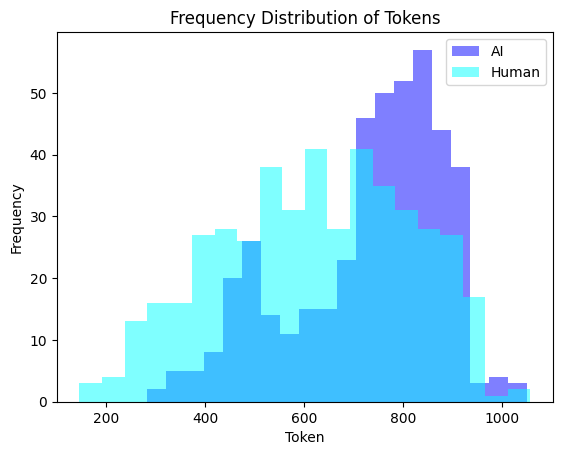

In [14]:
plt.hist([df_AI['Token']], bins=20, stacked=True, color=['blue'], alpha=0.5, label=['AI'])
plt.hist([df_Human['Token']], bins=20, stacked=True, color=['cyan'], alpha=0.5, label=['Human'])
plt.legend(loc='upper right')
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Tokens')
plt.show()

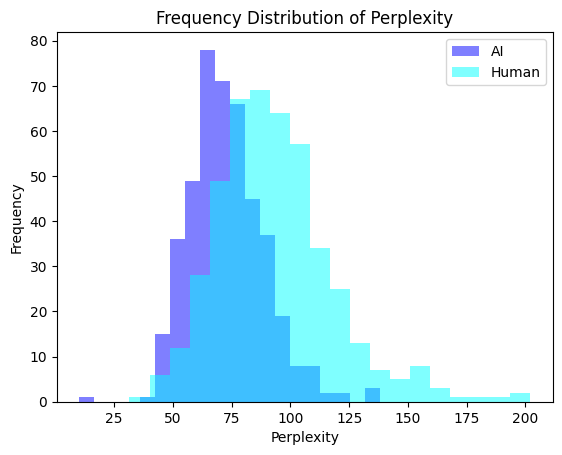

In [15]:
plt.hist([df_AI['Perplexity']], bins=20, stacked=True, color=['blue'], alpha=0.5, label=['AI'])
plt.hist([df_Human['Perplexity']], bins=20, stacked=True, color=['cyan'], alpha=0.5, label=['Human'])
plt.legend(loc='upper right')
plt.xlabel('Perplexity')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Perplexity')
plt.show()

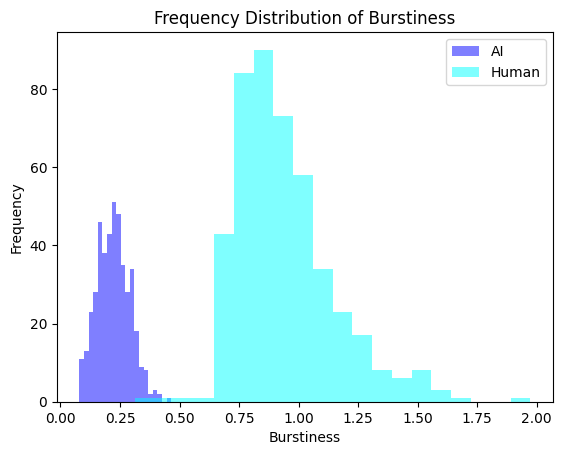

In [16]:
plt.hist([df_AI['Burstiness']], bins=20, stacked=True, color=['blue'], alpha=0.5, label=['AI'])
plt.hist([df_Human['Burstiness']], bins=20, stacked=True, color=['cyan'], alpha=0.5, label=['Human'])
plt.legend(loc='upper right')
plt.xlabel('Burstiness')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Burstiness')
plt.show()

In [17]:
# Step 5: Prepare the classifier
# Normally we would need labeled data for training, here we use dummy data
# Replace this with your actual labeled dataset

df = pd.concat([df_AI, df_Human], ignore_index=True,axis=0)
df = df.sample(frac=1).reset_index()
df = df[(df.Token < 1024)]
df

,index,text,Token,Perplexity,Burstiness,AI Metric
0,724,introdução_humano_62.3.docx,598,73.292542,0.828193,0
1,678,introdução_humano_46.1.docx,884,71.769623,0.792928,0
2,789,introdução_humano_87.2.docx,693,52.951256,0.914968,0
3,100,conclusão_ia_101.docx,668,96.654350,0.232741,1
4,213,introdução_ia_65a.docx,625,86.598274,0.110107,1
...,...,...,...,...,...,...
889,666,introdução_humano_42.2.docx,825,72.740417,1.051292,0
890,165,introdução_ia_25a.docx,404,100.598648,0.170817,1
891,85,conclusão_ia_86.docx,614,81.104164,0.168786,1
892,55,conclusão_ia_56.docx,836,51.579498,0.413299,1


In [18]:
X = df.drop(columns=['index', 'text', 'AI Metric'])
y = df['AI Metric']

**Redução da dimensionalidade**

Number of Dimensions: 3


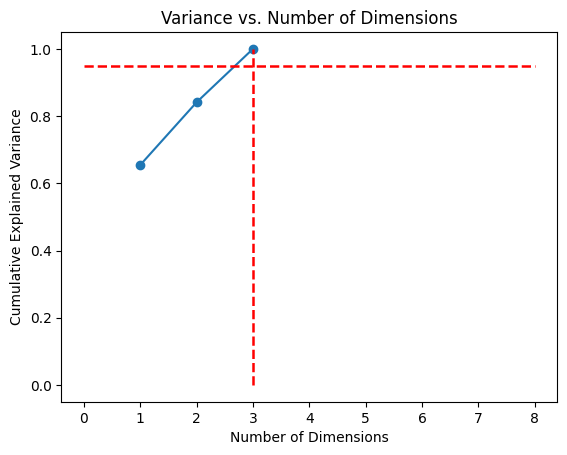

In [19]:
# Standardize features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the variance ratio

explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance

cumulative_variance = np.cumsum(explained_variance_ratio)

# Number of dimensions up to 95% variance

num_dimensions = np.argmax(cumulative_variance >= 0.95) + 1

print("Number of Dimensions:", num_dimensions)

# Plot the variance as a function of the number of dimensions

plt.plot(np.arange(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance vs. Number of Dimensions')
plt.hlines(0.95, 0, 8, linewidth=1.8, linestyle='--', color="red")
plt.vlines(num_dimensions, 0, 1.0, linewidth=1.8, linestyle='--', color="red")
plt.grid(False)
plt.show()

In [20]:
# PCA with the selected number of dimensions

pca = PCA(n_components=num_dimensions)
X_pca_selected = pca.fit_transform(X_scaled)


# Print transformed data

#print("Transformed Data:")
#print(X_pca_selected)

# Get the most important features and their weights

num_features = X.shape[1]  # Number of features (original number of columns)
feature_names = X.columns[:-1]  # Names of the features (all columns except the last one)

# Get PCA absolute weights

pc1_weights = np.abs(pca.components_[0])

# Sort the features based on their weights (descending order)

sorted_indices = np.argsort(pc1_weights)[::-1]
sorted_features = feature_names[sorted_indices-1]
sorted_weights = pc1_weights[sorted_indices]

# List most important features and their weights

#print("Most Important Features and Weights:")
feature_list = []
weight_list = []
for feature, weight in zip(sorted_features, sorted_weights):
    feature_list.append(feature)
    weight_list.append(weight)

print("Most Important",  num_dimensions," Features:", feature_list[:num_dimensions])
print("Most Important",  num_dimensions," Weights:", weight_list[:num_dimensions])

Most Important 3  Features: ['Token', 'Perplexity', 'Perplexity']
Most Important 3  Weights: [0.5881555435566241, 0.5832529011635493, 0.5602580743442394]


In [21]:
#X = df[[*feature_list[:num_dimensions]]]
#X

X = df.drop(columns=['index', 'text', 'AI Metric'])
y = df['AI Metric']

In [22]:
# Train-test split (here using the same data for simplicity)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Define the model pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [23]:
# Step 6: Predict if the text is AI-generated or human-written
AI_train = model.predict(X_train)
AI_predicted = model.predict(X_test)
result = pd.DataFrame({'AI_tested': y_test, 'AI Predicted': AI_predicted})
result

,AI_tested,AI Predicted
280,1,1
436,1,1
39,1,1
419,0,0
587,0,0
...,...,...
716,0,0
188,0,0
271,0,0
663,0,0


In [24]:
accuracy = accuracy_score(y_train, AI_train)
precision = precision_score(y_train, AI_train)
recall = recall_score(y_train, AI_train)

precision_s = precision_score(y_train, AI_train,average='micro')
recall_s    = recall_score(y_train, AI_train, average='micro')

print("Precision    : ", precision)
print("Recall       : ", recall)
print("F1_score     : ", 2*((precision_s*recall_s)/(precision_s + recall_s)))
print("Accuracy     : ", accuracy)
print("MCC          : ", matthews_corrcoef(y_train, AI_train))
print("Cohen´kappa  : ", cohen_kappa_score(y_train, AI_train))

Precision    :  0.9913419913419913
Recall       :  1.0
F1_score     :  0.9954954954954955
Accuracy     :  0.9954954954954955
MCC          :  0.9910197805170285
Cohen´kappa  :  0.9909794599865911


In [25]:
accuracy = accuracy_score(y_test, AI_predicted)
precision = precision_score(y_test, AI_predicted)
recall = recall_score(y_test, AI_predicted)

precision_s = precision_score(y_test, AI_predicted,average='micro')
recall_s    = recall_score(y_test, AI_predicted, average='micro')

print("Precision    : ", precision)
print("Recall       : ", recall)
print("F1_score     : ", 2*((precision_s*recall_s)/(precision_s + recall_s)))
print("Accuracy     : ", accuracy)
print("MCC          : ", matthews_corrcoef(y_test, AI_predicted))
print("Cohen´kappa  : ", cohen_kappa_score(y_test, AI_predicted))

Precision    :  0.9952380952380953
Recall       :  1.0
F1_score     :  0.9977528089887641
Accuracy     :  0.9977528089887641
MCC          :  0.9955003689929264
Cohen´kappa  :  0.9954902457562705


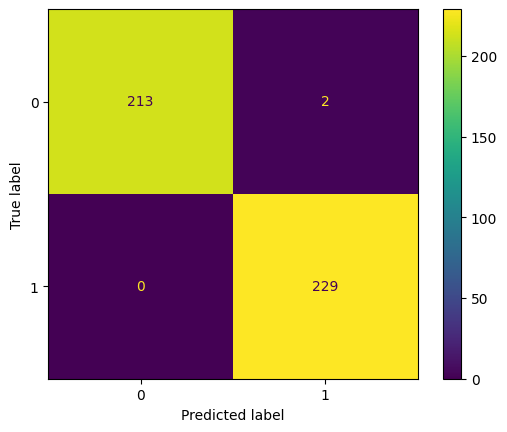

In [26]:
# Create the confusion matrix
cm = confusion_matrix(y_train, AI_train)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

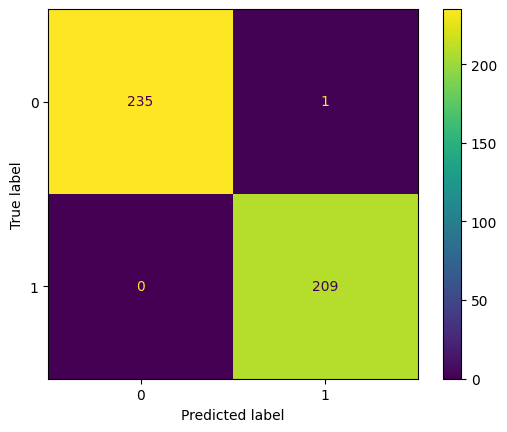

In [27]:
# Create the confusion matrix
cm = confusion_matrix(y_test, AI_predicted)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

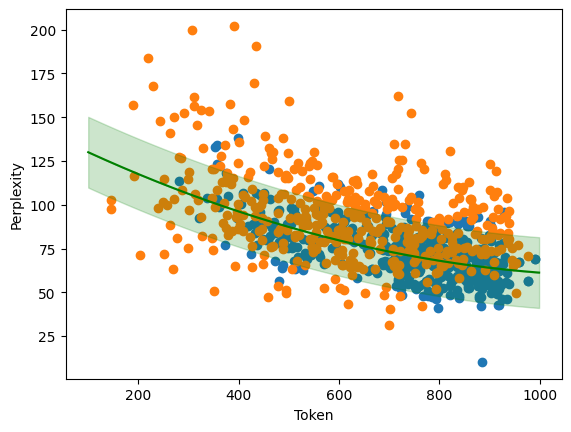

In [28]:
df_AI = df_AI[(df_AI.Token < 1024)]
df_Human = df_Human[(df_Human.Token < 1024)]

plt.scatter(df_AI.Token, df_AI.Perplexity)
plt.scatter(df_Human.Token, df_Human.Perplexity)
plt.xlabel('Token')
plt.ylabel('Perplexity')
linear_model = np.polyfit(df_AI.Token, df_AI.Perplexity, 2)
linear_model_fn = np.poly1d(linear_model)
x_s = np.arange(100, 1000)
plt.plot(x_s, linear_model_fn(x_s), color="green")
plt.fill_between(x_s, linear_model_fn(x_s), linear_model_fn(x_s)+np.std(linear_model_fn(x_s)), alpha=0.2, color="green")
plt.fill_between(x_s, linear_model_fn(x_s), linear_model_fn(x_s)-np.std(linear_model_fn(x_s)), alpha=0.2, color="green")
plt.show()

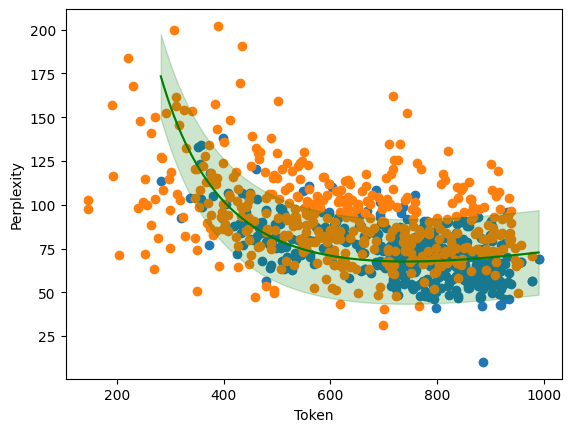

In [29]:
# fit a line to the economic data
from scipy.optimize import curve_fit

# define the true objective function
def objective(x, a, b):
	return a/x**2 + b*x

# load the dataset

# curve fit
popt, _ = curve_fit(objective, df_AI.Token, df_AI.Perplexity)
# summarize the parameter values
a, b = popt

# plot input vs output
plt.scatter(df_AI.Token, df_AI.Perplexity)
plt.scatter(df_Human.Token, df_Human.Perplexity)
plt.xlabel('Token')
plt.ylabel('Perplexity')

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(df_AI.Token), max(df_AI.Token), 1)
# calculate the output for the range
y_line = objective(x_line, a, b)
# create a line plot for the mapping function

plt.plot(x_line, y_line, color="green")
plt.fill_between(x_line, y_line, y_line+np.std(y_line), alpha=0.2, color="green")
plt.fill_between(x_line, y_line, y_line-np.std(y_line), alpha=0.2, color="green")
plt.show()

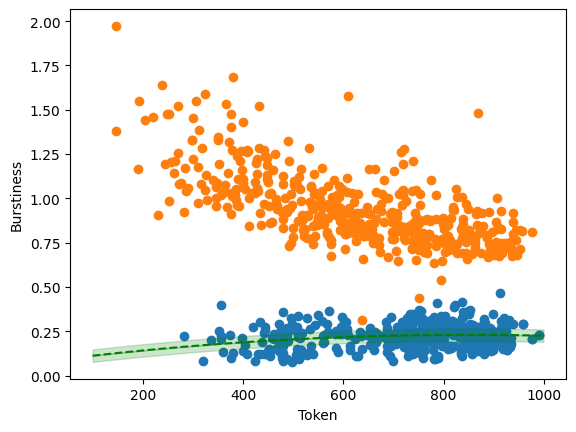

In [30]:
plt.scatter(df_AI.Token, df_AI.Burstiness)
plt.scatter(df_Human.Token, df_Human.Burstiness)
plt.xlabel('Token')
plt.ylabel('Burstiness')
linear_model = np.polyfit(df_AI.Token, df_AI.Burstiness, 2)
linear_model_fn = np.poly1d(linear_model)
x_s = np.arange(100, 1000)
plt.plot(x_s, linear_model_fn(x_s), color="green", linestyle="dashed")
plt.fill_between(x_s, linear_model_fn(x_s), linear_model_fn(x_s)+np.std(linear_model_fn(x_s)), alpha=0.2, color="green")
plt.fill_between(x_s, linear_model_fn(x_s), linear_model_fn(x_s)-np.std(linear_model_fn(x_s)), alpha=0.2, color="green")
plt.show()

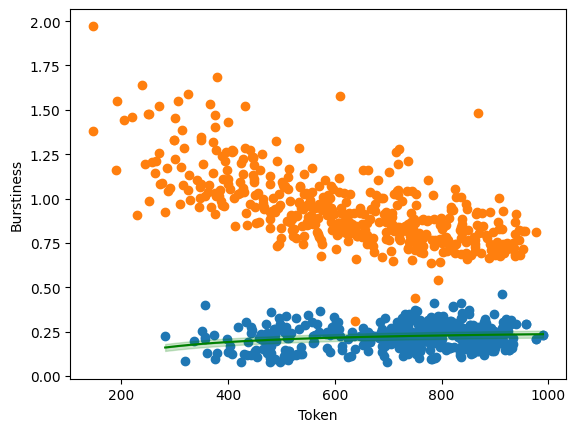

In [31]:
# fit a line to the economic data
from scipy.optimize import curve_fit

# define the true objective function
def objective(x, a, b):
	return a/x + b

# load the dataset

# curve fit
popt, _ = curve_fit(objective, df_AI.Token, df_AI.Burstiness)
# summarize the parameter values
a, b = popt

# plot input vs output
plt.scatter(df_AI.Token, df_AI.Burstiness)
plt.scatter(df_Human.Token, df_Human.Burstiness)
plt.xlabel('Token')
plt.ylabel('Burstiness')

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(df_AI.Token), max(df_AI.Token), 1)
# calculate the output for the range
y_line = objective(x_line, a, b)
# create a line plot for the mapping function

plt.plot(x_line, y_line, color="green")
plt.fill_between(x_line, y_line, y_line+np.std(y_line), alpha=0.2, color="green")
plt.fill_between(x_line, y_line, y_line-np.std(y_line), alpha=0.2, color="green")
plt.show()

In [32]:
# Define the model pipeline

rf_model = make_pipeline(StandardScaler(), RandomForestClassifier())
#et_model = make_pipeline(StandardScaler(), ExtraTreesClassifier())
#dt_model = make_pipeline(StandardScaler(), DecisionTreeClassifier())
#ab_model = make_pipeline(StandardScaler(), AdaBoostClassifier())

# Train the model
rf_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [33]:
# Step 6: Predict if the text is AI-generated or human-written
AI_train = rf_model.predict(X_train)
AI_predicted = rf_model.predict(X_test)
result_rf = pd.DataFrame({'AI_tested': y_test, 'AI Predicted': AI_predicted})
result_rf

,AI_tested,AI Predicted
280,1,1
436,1,1
39,1,1
419,0,0
587,0,0
...,...,...
716,0,0
188,0,0
271,0,0
663,0,0


In [34]:
accuracy = accuracy_score(y_train, AI_train)
precision = precision_score(y_train, AI_train)
recall = recall_score(y_train, AI_train)

precision_s = precision_score(y_train, AI_train,average='micro')
recall_s    = recall_score(y_train, AI_train, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_train, AI_train):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_train, AI_train):.3f}")

Precision    :  1.000
Recall       :  1.000
F1_score     :  1.000
Accuracy     :  1.000
MCC          :  1.000
Cohen´kappa  :  1.000


In [35]:
accuracy = accuracy_score(y_test, AI_predicted)
precision = precision_score(y_test, AI_predicted)
recall = recall_score(y_test, AI_predicted)

precision_s = precision_score(y_test, AI_predicted,average='micro')
recall_s    = recall_score(y_test, AI_predicted, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_test, AI_predicted):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_test, AI_predicted):.3f}")

Precision    :  0.995
Recall       :  1.000
F1_score     :  0.998
Accuracy     :  0.998
MCC          :  0.996
Cohen´kappa  :  0.995


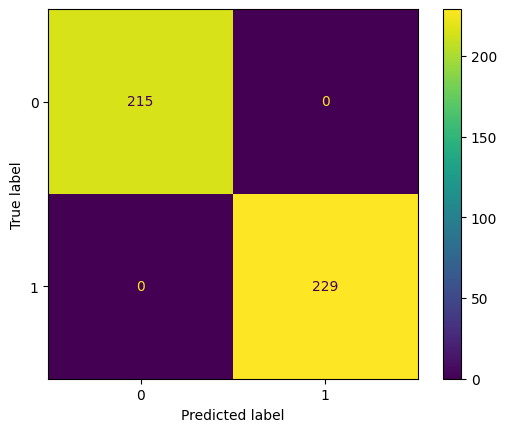

In [36]:
# Create the confusion matrix
cm = confusion_matrix(y_train, AI_train)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

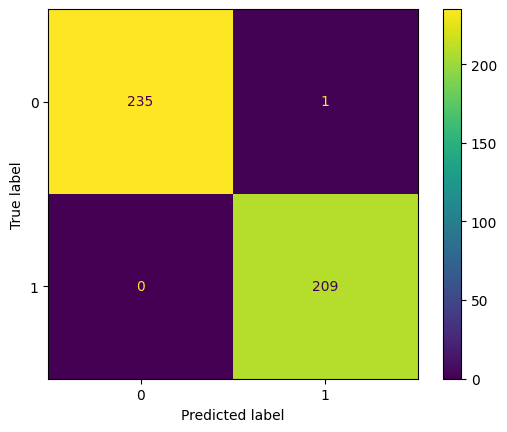

In [37]:
# Create the confusion matrix
cm = confusion_matrix(y_test, AI_predicted)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [38]:
#save model
from google.colab import files
with open("rf_model.pkl", "wb") as f:
     pickle.dump(rf_model, f)

#load model
with open("rf_model.pkl", "rb") as f:
     best_rf = pickle.load(f) # Use pickle.load to load the model
files.download("rf_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
# Define the model pipeline

#rf_model = make_pipeline(StandardScaler(), RandomForestClassifier())
et_model = make_pipeline(StandardScaler(), ExtraTreesClassifier())
#dt_model = make_pipeline(StandardScaler(), DecisionTreeClassifier())
#ab_model = make_pipeline(StandardScaler(), AdaBoostClassifier())

# Train the model
et_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('extratreesclassifier', ExtraTreesClassifier())])

In [40]:
# Step 6: Predict if the text is AI-generated or human-written
AI_train = et_model.predict(X_train)
AI_predicted = et_model.predict(X_test)
result_et = pd.DataFrame({'AI_tested': y_test, 'AI Predicted': AI_predicted})
result_et

,AI_tested,AI Predicted
280,1,1
436,1,1
39,1,1
419,0,0
587,0,0
...,...,...
716,0,0
188,0,0
271,0,0
663,0,0


In [41]:
accuracy = accuracy_score(y_train, AI_train)
precision = precision_score(y_train, AI_train)
recall = recall_score(y_train, AI_train)

precision_s = precision_score(y_train, AI_train,average='micro')
recall_s    = recall_score(y_train, AI_train, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_train, AI_train):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_train, AI_train):.3f}")

Precision    :  1.000
Recall       :  1.000
F1_score     :  1.000
Accuracy     :  1.000
MCC          :  1.000
Cohen´kappa  :  1.000


In [42]:
accuracy = accuracy_score(y_test, AI_predicted)
precision = precision_score(y_test, AI_predicted)
recall = recall_score(y_test, AI_predicted)

precision_s = precision_score(y_test, AI_predicted,average='micro')
recall_s    = recall_score(y_test, AI_predicted, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_test, AI_predicted):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_test, AI_predicted):.3f}")

Precision    :  0.995
Recall       :  1.000
F1_score     :  0.998
Accuracy     :  0.998
MCC          :  0.996
Cohen´kappa  :  0.995


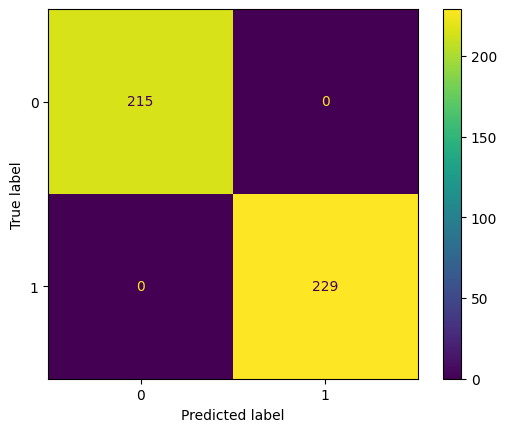

In [43]:
# Create the confusion matrix
cm = confusion_matrix(y_train, AI_train)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

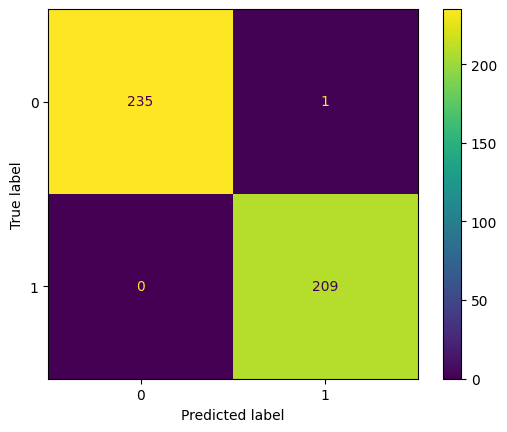

In [44]:
# Create the confusion matrix
cm = confusion_matrix(y_test, AI_predicted)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [45]:
#save model
with open("et_model.pkl", "wb") as f:
     pickle.dump(et_model, f)

#load model
with open("et_model.pkl", "rb") as f:
     best_et = pickle.load(f) # Use pickle.load to load the model
files.download("et_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
#rf_model = make_pipeline(StandardScaler(), RandomForestClassifier())
#et_model = make_pipeline(StandardScaler(), ExtraTreesClassifier())
dt_model = make_pipeline(StandardScaler(), DecisionTreeClassifier())
#ab_model = make_pipeline(StandardScaler(), AdaBoostClassifier())

# Train the model
dt_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [47]:
# Step 6: Predict if the text is AI-generated or human-written
AI_train = dt_model.predict(X_train)
AI_predicted = dt_model.predict(X_test)
result_dt = pd.DataFrame({'AI_tested': y_test, 'AI Predicted': AI_predicted})
result_dt

,AI_tested,AI Predicted
280,1,1
436,1,1
39,1,1
419,0,0
587,0,0
...,...,...
716,0,0
188,0,0
271,0,0
663,0,0


In [48]:
accuracy = accuracy_score(y_train, AI_train)
precision = precision_score(y_train, AI_train)
recall = recall_score(y_train, AI_train)

precision_s = precision_score(y_train, AI_train,average='micro')
recall_s    = recall_score(y_train, AI_train, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_train, AI_train):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_train, AI_train):.3f}")

Precision    :  1.000
Recall       :  1.000
F1_score     :  1.000
Accuracy     :  1.000
MCC          :  1.000
Cohen´kappa  :  1.000


In [49]:
accuracy = accuracy_score(y_test, AI_predicted)
precision = precision_score(y_test, AI_predicted)
recall = recall_score(y_test, AI_predicted)

precision_s = precision_score(y_test, AI_predicted,average='micro')
recall_s    = recall_score(y_test, AI_predicted, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_test, AI_predicted):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_test, AI_predicted):.3f}")

Precision    :  0.995
Recall       :  1.000
F1_score     :  0.998
Accuracy     :  0.998
MCC          :  0.996
Cohen´kappa  :  0.995


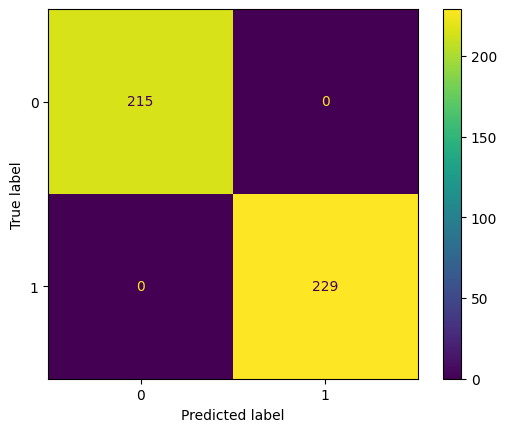

In [50]:
# Create the confusion matrix
cm = confusion_matrix(y_train, AI_train)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

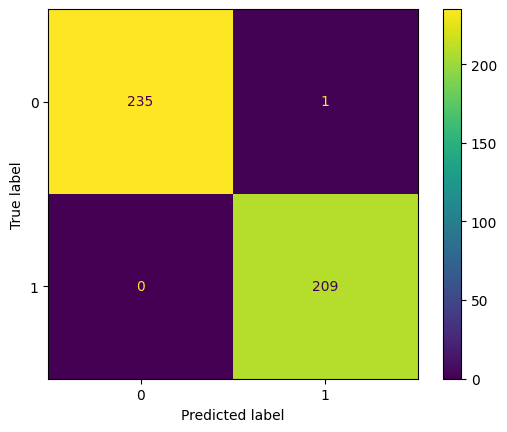

In [51]:
# Create the confusion matrix
cm = confusion_matrix(y_test, AI_predicted)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [52]:
#save model
with open("dt_model.pkl", "wb") as f:
     pickle.dump(dt_model, f)

#load model
with open("dt_model.pkl", "rb") as f:
     best_dt = pickle.load(f) # Use pickle.load to load the model
files.download("dt_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
# Define the model pipeline

#rf_model = make_pipeline(StandardScaler(), RandomForestClassifier())
#et_model = make_pipeline(StandardScaler(), ExtraTreesClassifier())
#dt_model = make_pipeline(StandardScaler(), DecisionTreeClassifier())
ab_model = make_pipeline(StandardScaler(), AdaBoostClassifier())

# Train the model
ab_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier', AdaBoostClassifier())])

In [54]:
# Step 6: Predict if the text is AI-generated or human-written
AI_train = ab_model.predict(X_train)
AI_predicted = ab_model.predict(X_test)
result_ab = pd.DataFrame({'AI_tested': y_test, 'AI Predicted': AI_predicted})
result_ab

,AI_tested,AI Predicted
280,1,1
436,1,1
39,1,1
419,0,0
587,0,0
...,...,...
716,0,0
188,0,0
271,0,0
663,0,0


In [55]:
accuracy = accuracy_score(y_train, AI_train)
precision = precision_score(y_train, AI_train)
recall = recall_score(y_train, AI_train)

precision_s = precision_score(y_train, AI_train,average='micro')
recall_s    = recall_score(y_train, AI_train, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_train, AI_train):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_train, AI_train):.3f}")

Precision    :  1.000
Recall       :  1.000
F1_score     :  1.000
Accuracy     :  1.000
MCC          :  1.000
Cohen´kappa  :  1.000


In [56]:
accuracy = accuracy_score(y_test, AI_predicted)
precision = precision_score(y_test, AI_predicted)
recall = recall_score(y_test, AI_predicted)

precision_s = precision_score(y_test, AI_predicted,average='micro')
recall_s    = recall_score(y_test, AI_predicted, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_test, AI_predicted):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_test, AI_predicted):.3f}")

Precision    :  0.995
Recall       :  1.000
F1_score     :  0.998
Accuracy     :  0.998
MCC          :  0.996
Cohen´kappa  :  0.995


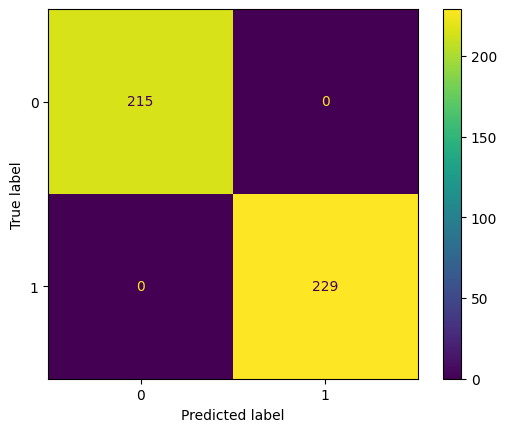

In [57]:
# Create the confusion matrix
cm = confusion_matrix(y_train, AI_train)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

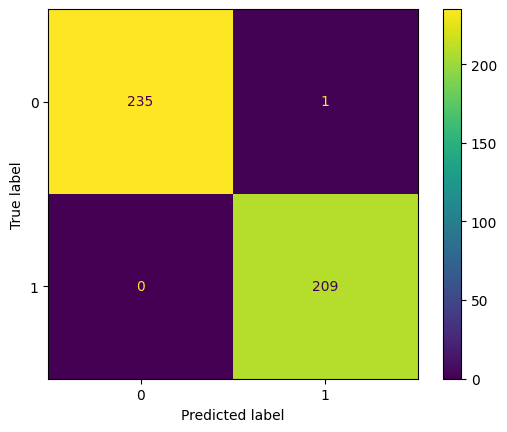

In [58]:
# Create the confusion matrix
cm = confusion_matrix(y_test, AI_predicted)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [59]:
#save model
with open("ab_model.pkl", "wb") as f:
     pickle.dump(ab_model, f)

#load model
with open("ab_model.pkl", "rb") as f:
     best_ab = pickle.load(f) # Use pickle.load to load the model
files.download("ab_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
df['AI Metric'].value_counts()[0]

451

In [61]:
df['AI Metric'].value_counts()[1]

438

In [62]:
#create two different dataframe of majority and minority class
df_majority = df[(df['AI Metric']==1)]
df_minority = df[(df['AI Metric']==0)]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= df['AI Metric'].value_counts()[1], # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [63]:
df_upsampled['AI Metric'].value_counts()[0]

438

In [64]:
df_upsampled['AI Metric'].value_counts()[1]

438

In [65]:
X = df_upsampled.drop(columns=['index', 'text', 'AI Metric'])
y = df_upsampled['AI Metric']

In [66]:
#X = df_upsampled[[*feature_list[:num_dimensions]]]
X

,Token,Perplexity,Burstiness
204,586,115.655022,0.905007
865,562,78.467667,0.949334
697,797,61.320057,0.769910
547,423,118.415878,1.031772
215,548,73.174721,0.866980
...,...,...,...
886,899,71.949554,0.189303
887,814,66.488411,0.275644
890,404,100.598648,0.170817
891,614,81.104164,0.168786


In [67]:
# Train-test split (here using the same data for simplicity)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Define the model pipeline

rf_model_resample = make_pipeline(StandardScaler(), RandomForestClassifier())
#rf_model_resample = make_pipeline(StandardScaler(), ExtraTreesClassifier())
#rf_model_resample = make_pipeline(StandardScaler(), DecisionTreeClassifier())
#rf_model_resample = make_pipeline(StandardScaler(), AdaBoostClassifier())

# Train the model
rf_model_resample.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [68]:
# Step 6: Predict if the text is AI-generated or human-written
AI_train = rf_model_resample.predict(X_train)
AI_predicted = rf_model_resample.predict(X_test)
result_rf = pd.DataFrame({'AI_tested': y_test, 'AI Predicted': AI_predicted})
result_rf

,AI_tested,AI Predicted
879,0,0
426,1,1
795,1,1
502,1,1
880,0,0
...,...,...
681,1,1
697,0,0
108,0,0
204,0,0


In [69]:
accuracy = accuracy_score(y_train, AI_train)
precision = precision_score(y_train, AI_train)
recall = recall_score(y_train, AI_train)

precision_s = precision_score(y_train, AI_train,average='micro')
recall_s    = recall_score(y_train, AI_train, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_train, AI_train):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_train, AI_train):.3f}")

Precision    :  1.000
Recall       :  1.000
F1_score     :  1.000
Accuracy     :  1.000
MCC          :  1.000
Cohen´kappa  :  1.000


In [70]:
accuracy = accuracy_score(y_test, AI_predicted)
precision = precision_score(y_test, AI_predicted)
recall = recall_score(y_test, AI_predicted)

precision_s = precision_score(y_test, AI_predicted,average='micro')
recall_s    = recall_score(y_test, AI_predicted, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_test, AI_predicted):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_test, AI_predicted):.3f}")

Precision    :  0.967
Recall       :  1.000
F1_score     :  0.984
Accuracy     :  0.984
MCC          :  0.968
Cohen´kappa  :  0.968


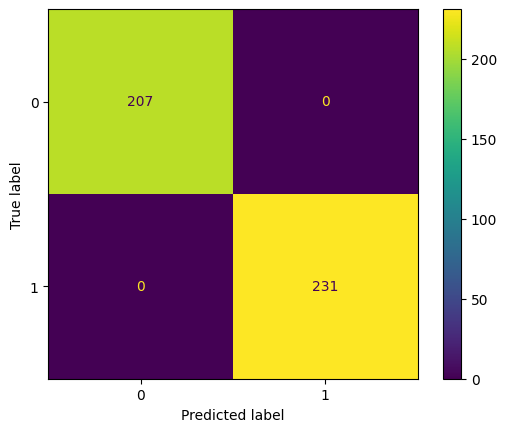

In [71]:
# Create the confusion matrix
cm = confusion_matrix(y_train, AI_train)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

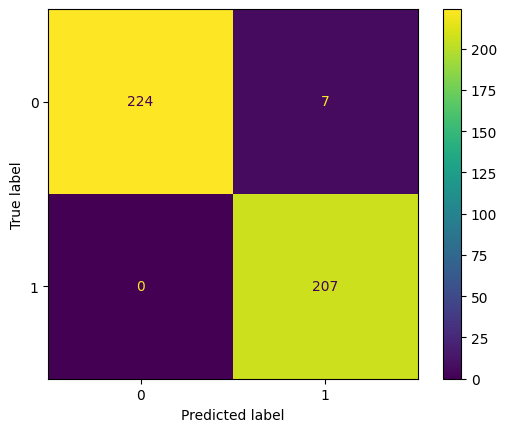

In [72]:
# Create the confusion matrix
cm = confusion_matrix(y_test, AI_predicted)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [73]:
df.to_excel("text_classification.xlsx")
files.download("text_classification.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
#save model
from google.colab import files
with open("rf_model_resample.pkl", "wb") as f:
     pickle.dump(rf_model_resample, f)

#load model
with open("rf_model_resample.pkl", "rb") as f:
     best_rf_resample = pickle.load(f) # Use pickle.load to load the model
files.download("rf_model_resample.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [75]:
# Train-test split (here using the same data for simplicity)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Define the model pipeline

#rf_model_resample = make_pipeline(StandardScaler(), RandomForestClassifier())
et_model_resample = make_pipeline(StandardScaler(), ExtraTreesClassifier())
#rf_model_resample = make_pipeline(StandardScaler(), DecisionTreeClassifier())
#rf_model_resample = make_pipeline(StandardScaler(), AdaBoostClassifier())

# Train the model
et_model_resample.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('extratreesclassifier', ExtraTreesClassifier())])

In [76]:
# Step 6: Predict if the text is AI-generated or human-written
AI_train = et_model_resample.predict(X_train)
AI_predicted = et_model_resample.predict(X_test)
result_et = pd.DataFrame({'AI_tested': y_test, 'AI Predicted': AI_predicted})
result_et

,AI_tested,AI Predicted
879,0,0
426,1,1
795,1,1
502,1,1
880,0,0
...,...,...
681,1,1
697,0,0
108,0,0
204,0,0


In [77]:
accuracy = accuracy_score(y_train, AI_train)
precision = precision_score(y_train, AI_train)
recall = recall_score(y_train, AI_train)

precision_s = precision_score(y_train, AI_train,average='micro')
recall_s    = recall_score(y_train, AI_train, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_train, AI_train):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_train, AI_train):.3f}")

Precision    :  1.000
Recall       :  1.000
F1_score     :  1.000
Accuracy     :  1.000
MCC          :  1.000
Cohen´kappa  :  1.000


In [78]:
accuracy = accuracy_score(y_test, AI_predicted)
precision = precision_score(y_test, AI_predicted)
recall = recall_score(y_test, AI_predicted)

precision_s = precision_score(y_test, AI_predicted,average='micro')
recall_s    = recall_score(y_test, AI_predicted, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_test, AI_predicted):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_test, AI_predicted):.3f}")

Precision    :  0.967
Recall       :  1.000
F1_score     :  0.984
Accuracy     :  0.984
MCC          :  0.968
Cohen´kappa  :  0.968


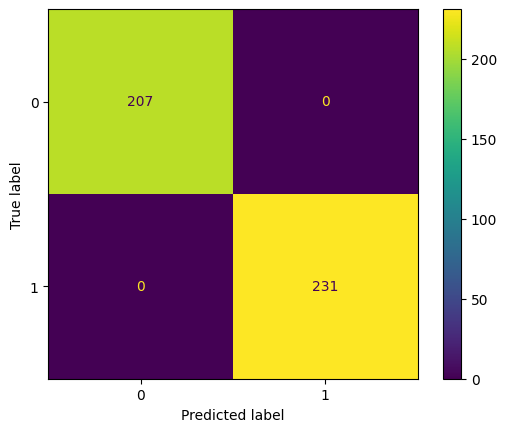

In [79]:
# Create the confusion matrix
cm = confusion_matrix(y_train, AI_train)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

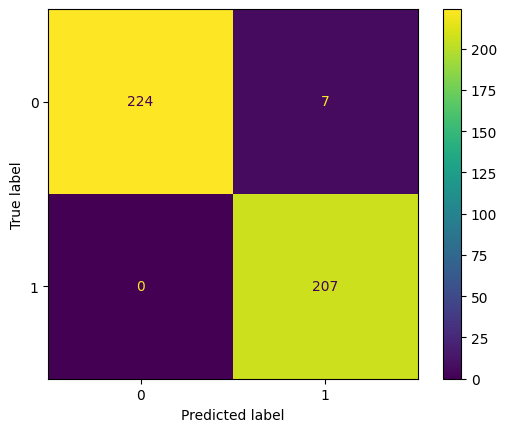

In [80]:
# Create the confusion matrix
cm = confusion_matrix(y_test, AI_predicted)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [81]:
#save model
with open("et_model_resample.pkl", "wb") as f:
     pickle.dump(et_model_resample, f)

#load model
with open("et_model_resample.pkl", "rb") as f:
     best_et_resample = pickle.load(f) # Use pickle.load to load the model
files.download("et_model_resample.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [82]:
# Train-test split (here using the same data for simplicity)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Define the model pipeline

#rf_model_resample = make_pipeline(StandardScaler(), RandomForestClassifier())
#et_model_resample = make_pipeline(StandardScaler(), ExtraTreesClassifier())
#rf_model_resample = make_pipeline(StandardScaler(), DecisionTreeClassifier())
ab_model_resample = make_pipeline(StandardScaler(), AdaBoostClassifier())

# Train the model
ab_model_resample.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier', AdaBoostClassifier())])

In [83]:
# Step 6: Predict if the text is AI-generated or human-written
AI_train = ab_model.predict(X_train)
AI_predicted = ab_model.predict(X_test)
result_ab = pd.DataFrame({'AI_tested': y_test, 'AI Predicted': AI_predicted})
result_ab

,AI_tested,AI Predicted
879,0,0
426,1,1
795,1,1
502,1,1
880,0,0
...,...,...
681,1,1
697,0,0
108,0,0
204,0,0


In [84]:
accuracy = accuracy_score(y_train, AI_train)
precision = precision_score(y_train, AI_train)
recall = recall_score(y_train, AI_train)

precision_s = precision_score(y_train, AI_train,average='micro')
recall_s    = recall_score(y_train, AI_train, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_train, AI_train):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_train, AI_train):.3f}")

Precision    :  1.000
Recall       :  1.000
F1_score     :  1.000
Accuracy     :  1.000
MCC          :  1.000
Cohen´kappa  :  1.000


In [85]:
accuracy = accuracy_score(y_test, AI_predicted)
precision = precision_score(y_test, AI_predicted)
recall = recall_score(y_test, AI_predicted)

precision_s = precision_score(y_test, AI_predicted,average='micro')
recall_s    = recall_score(y_test, AI_predicted, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_test, AI_predicted):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_test, AI_predicted):.3f}")

Precision    :  0.995
Recall       :  1.000
F1_score     :  0.998
Accuracy     :  0.998
MCC          :  0.995
Cohen´kappa  :  0.995


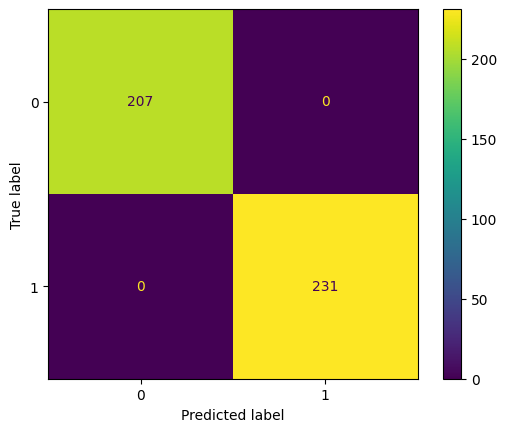

In [86]:
# Create the confusion matrix
cm = confusion_matrix(y_train, AI_train)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

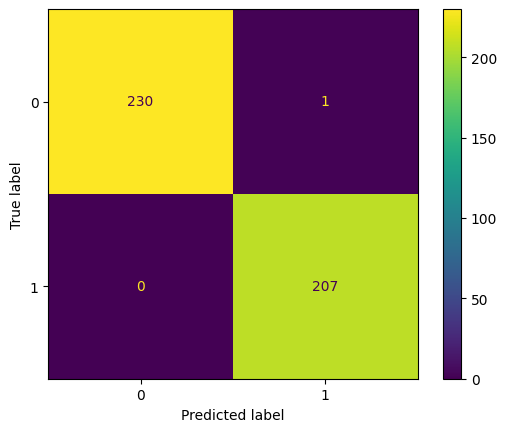

In [87]:
# Create the confusion matrix
cm = confusion_matrix(y_test, AI_predicted)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [88]:
#save model
with open("ab_model_resample.pkl", "wb") as f:
     pickle.dump(ab_model_resample, f)

#load model
with open("ab_model_resample.pkl", "rb") as f:
     best_ab_resample = pickle.load(f) # Use pickle.load to load the model
files.download("ab_model_resample.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [89]:
# Train-test split (here using the same data for simplicity)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Define the model pipeline

#rf_model_resample = make_pipeline(StandardScaler(), RandomForestClassifier())
#et_model_resample = make_pipeline(StandardScaler(), ExtraTreesClassifier())
dt_model_resample = make_pipeline(StandardScaler(), DecisionTreeClassifier())
#ab_model_resample = make_pipeline(StandardScaler(), AdaBoostClassifier())

# Train the model
dt_model_resample.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [90]:
# Step 6: Predict if the text is AI-generated or human-written
AI_train = dt_model_resample.predict(X_train)
AI_predicted = dt_model_resample.predict(X_test)
result_dt = pd.DataFrame({'AI_tested': y_test, 'AI Predicted': AI_predicted})
result_dt

,AI_tested,AI Predicted
879,0,0
426,1,1
795,1,1
502,1,1
880,0,0
...,...,...
681,1,1
697,0,0
108,0,0
204,0,0


In [91]:
accuracy = accuracy_score(y_train, AI_train)
precision = precision_score(y_train, AI_train)
recall = recall_score(y_train, AI_train)

precision_s = precision_score(y_train, AI_train,average='micro')
recall_s    = recall_score(y_train, AI_train, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_train, AI_train):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_train, AI_train):.3f}")

Precision    :  1.000
Recall       :  1.000
F1_score     :  1.000
Accuracy     :  1.000
MCC          :  1.000
Cohen´kappa  :  1.000


In [92]:
accuracy = accuracy_score(y_test, AI_predicted)
precision = precision_score(y_test, AI_predicted)
recall = recall_score(y_test, AI_predicted)

precision_s = precision_score(y_test, AI_predicted,average='micro')
recall_s    = recall_score(y_test, AI_predicted, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_test, AI_predicted):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_test, AI_predicted):.3f}")

Precision    :  0.972
Recall       :  1.000
F1_score     :  0.986
Accuracy     :  0.986
MCC          :  0.973
Cohen´kappa  :  0.973


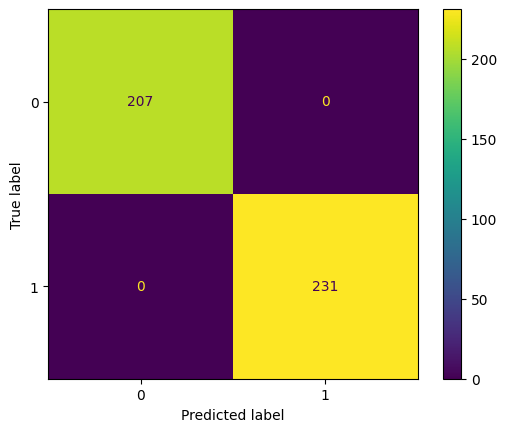

In [93]:
# Create the confusion matrix
cm = confusion_matrix(y_train, AI_train)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

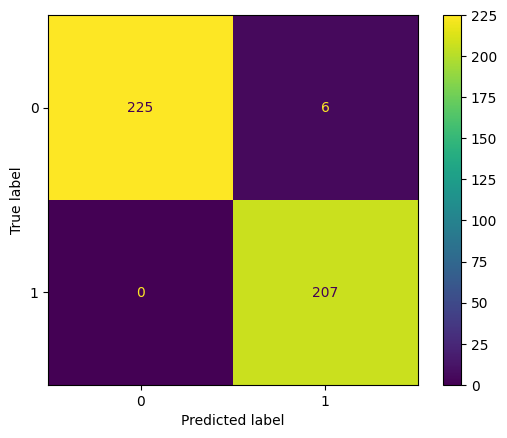

In [94]:
# Create the confusion matrix
cm = confusion_matrix(y_test, AI_predicted)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [95]:
#save model
with open("dt_model_resample.pkl", "wb") as f:
     pickle.dump(dt_model_resample, f)

#load model
with open("dt_model_resample.pkl", "rb") as f:
     best_dt_resample = pickle.load(f) # Use pickle.load to load the model
files.download("dt_model_resample.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>